This notebook contains the solution for task 2 (Astrophysical Absorption Line Exercise)

This is a detailed, lengthy notebook. If time is of the essence, the final answers have been put up in the Short version of this notebook.

First, we start off by importing the required libraries and initialising the constants we'll be using.

In [1]:
# Import Statements
import matplotlib.pyplot as plt
from math import pi, exp

In [2]:
# Constants
# Slab Properties
nH = 0.1  # cm -3
x = 0.1
# Hydrogen Properties (Lyman)
G = 6.265e8  # s -1
f = 0.4164
g0 = 2
Z = 2.0
# Other consts
me = 9.11e-28  # g
c = 3e10  # cm s -1
e = 4.80e-10  # cm 3/2 g 1/2 s-1

From the problem statement, we know that we need to generate the spectrum of light after it passes through a slab of gas.

The formula for this has been provided, and is as follows:
1. Formula for the Absorption Coefficient
$$
\alpha(\upsilon) = \frac{e^{2}fn_{H}}{4\pi m_ec}\frac{(1-x)g_o}{Z}\frac{G}{(\upsilon - \upsilon_{0})^{2}+(\frac{G}{4\pi})^{2}}
$$

2. Formula for Intensity
$$
I(\lambda) = e^{-\alpha(\upsilon)d}
$$

In [4]:
# Implementing Formula for Absorption Coefficient
def calcAlpha(v, v0):
    '''
    Inputs :
        v : Frequency
        v0 : Central Frequency

    Output :
        a : Absorption Coefficient

    Formula taken from task 2 page 2
    '''
    A = (e * e * f * nH) / (4 * pi * me * c)
    B = ((1 - x) * g0) / (Z)
    C = (G) / ((v - v0) ** 2 + (G / (4 * pi)) ** 2)
    a = A * B * C
    return a

In [5]:
# Implementing formula to calculate Intensity
def calcIntensity(l, v0, d):
    '''
    Inputs :
        l : Wavelength
        v0 : Central Frequency
        d : Thickness of slab

    Output :
        I : (Intensity of light)

    Forumla taken from task 2 page 2
    '''
    # Calculates freq. from wavelength
    v = c / l
    # Calculates Alpha for wavelength and central freq.
    a = calcAlpha(v, v0)
    # Calculates Intensity for Alpha and d
    I = exp(a * d * -1)
    # Returns I
    return I

In [7]:
# Test to see if the equations work properly
# Wavelength : 1015 A
# Central Frequency : 2.4660
# Thickness of slab : 1 cm
print(calcIntensity(1015e-7, 2.4660, 1))

1.0


The above result is in accordance with what is to be expected. How? Because we're calculating the intensity of light which makes it through the gas slab, and the formula is telling us that all the light which came in, is coming out. This makes sense.

Now, we create a class called 'Spectrum'. Why? Because once we create an object of the class, it can be used in multiple contexts, which on the long run should make things easier for us.

The class has the following properties:

        Variables:
            v0 : central frequency for the spectrum
            d : thickness of slab for spectrum
            res : Number of steps between low and up
            low : Lower limit / frequency to start from
            up : Upper limit / frequency to terminate generation at
            intensities : list of intensity for each wavelength
            wavelengths : list of wavelengths we're calculating intensities for

        Methods:
            __init__
                Creates object of class
                Requires 'v0' and 'd'

            generate
                Generates the spectrum for the object
                Requires 'res', 'l', 'u'

            show
                Shows the spectrum generated for the object
                Saves plot if flag is true

            __len__
                Returns the number of elements in Intensities

            __repr__
                Prints the values of v0 and d for the object

In [11]:
class Spectrum(object):
    def __init__(self, v0, d, res, low, up):
        '''
        Inputs :
            v0 : Central Frequency
            d : Thickness of slab
            res : Number of steps between low and up
            low : Lower limit / frequency to start from
            up : Upper limit / frequency to terminate generation at
        '''
        self.v0 = v0
        self.d = d
        self.res = res
        self.low = low / 10 ** 7
        self.up = up / 10 ** 7
        self.wavelengths = []
        self.intensities = []

    def generate(self):
        '''
        Generates list of intensities for the spectrum
        '''
        # Clears list of intensities and wavelengths
        self.intensities = []
        self.wavelengths = []
        # Finds the step value for the simulation
        STEP = (self.up - self.low) / self.res
        # Runs for loop, iterating across all wavelengths
        for i in range(self.res):
            # Wavelength
            w = self.low + (i * STEP)
            # Add wavelength to list of wavelengths
            self.wavelengths.append(w * 10**7)
            # Calculate intensity for wavelength
            intensity = calcIntensity(w, self.v0, self.d)
            # Add intensity to list of intensities
            self.intensities.append(intensity)

    def show(self, save=False):
        plt.plot(self.wavelengths, self.intensities)
        plt.xlabel("Wavelength (nm)")
        plt.ylabel("Intensity")
        plt.title("Spectrum")
        plt.show()
        if not save:
            return None

        if not os.path.exists('Plots'):
            os.mkdir('Plots')

        plt.savefig(f'Plots/{self.v0}_{self.d}_{self.res}_{self.low}_{self.up}.jpg')

    def __len__(self):
        return len(self.intensities)

    def __repr__(self):
        return f"Central Frequency : {self.v0}\nThickness of slab : {self.d}"

Now that we've created a class, let's try and generate the spectrum for the first subdivision, where
$$
d = 10^{14} cm
$$

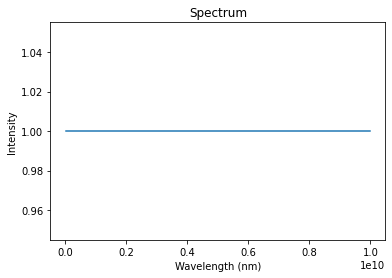

In [10]:
'''
Parameters:
v0 = 2.46607 x 10 ^ 15 ( Central Frequency )
d = 10 ^ 14 ( Thickness of slab )
res = 1000 ( Resolution of graph / Number of wavelengths calculated )
low = 0 ( Lower limit of wavelength to start the plot )
up = 1000 ( Upper limit of wavelength to end the plot )
'''
# Create object of the spectrum class with the above properties
obj = Spectrum(2.46607e15, 10e14, 1000, 1, 1000)
# Calculate the data required for the plot
obj.generate()
# Show the plot
obj.show()

Whoops! That doesn't look right. As we can see, there are a couple of issues with our parameters.
For starters, we had defined the unit of the x-axis of the graph to be in nanometers, but the class takes input in cm. We fix that first, and run the plot again.

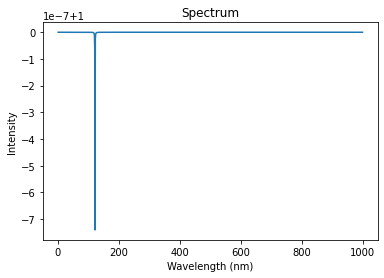

In [13]:
# Create object of the spectrum class with the above properties
obj = Spectrum(2.46607e15, 10e14, 1000, 1, 1000)
# Calculate the data required for the plot
obj.generate()
# Show the plot
obj.show()

Now that looks more like what we're looking for. But upon closely examining the axes, we can see that we have a couple of issues with this plot.

1. We have no way of figuring out where this lies on the x-axis
2. The y-axis is dealing with values where we're only messing with the last digit of 1.000000. That means that despite us noticing a dip here, the change in intensity is negligible.

So, how do we fix these issues?
We can fix '1' by adding a couple of print statements, as shown below.

-----------------------------
Number of wavelengths sampled:  1000
Central Frequency : 2466070000000000.0
Thickness of slab : 1000000000000000.0
Wavelength of Minimum Intensity:  121.879 nm
Minimum Intensity:  0.999999259598372


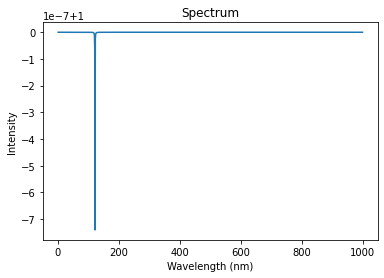

-----------------------------


In [15]:
print("-----------------------------")
print("Number of wavelengths sampled: ", len(obj))
print(obj)
# We select the wavelength for which we have a corresponding minimum intensity
# In retrospect, using dictionaries could have made this step easier.
print("Wavelength of Minimum Intensity: ",
      obj.wavelengths[obj.intensities.index(min(obj.intensities))],
      "nm")
# Now, we print the minimum intensity
print("Minimum Intensity: ",
      obj.intensities[obj.intensities.index(min(obj.intensities))])
obj.show()
print("-----------------------------")

Now we're getting somewhere. First things first. From the statements above, we can make the following observations from the graph:
1. The wavelength we're looking at is 121.879 nm
2. The minimum intensity we observe is 0.999999259598372

With these observations, we can make the following inferences:

1. Narrowing the search to around 121 nm could yield us better results with respect to the task at hand.
2. The intensity dip, although negligible, tells us that we're on the right track.

So now, let's generate the spectrum again, armed with these insights!

-----------------------------
Number of wavelengths sampled:  1000
Central Frequency : 2466070000000000.0
Thickness of slab : 1000000000000000.0
Wavelength of Minimum Intensity:  121.66 nm
Minimum Intensity:  0.9995217550795075


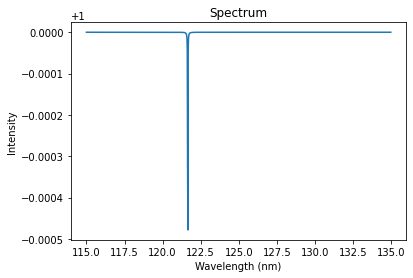

-----------------------------


In [17]:
# Create object of the spectrum class with the above properties
obj = Spectrum(2.46607e15, 10e14, 1000, 115, 135)
# Calculate the data required for the plot
obj.generate()

print("-----------------------------")
print("Number of wavelengths sampled: ", len(obj))
print(obj)
# We select the wavelength for which we have a corresponding minimum intensity
# In retrospect, using dictionaries could have made this step easier.
print("Wavelength of Minimum Intensity: ",
      obj.wavelengths[obj.intensities.index(min(obj.intensities))],
      "nm")
# Now, we print the minimum intensity
print("Minimum Intensity: ",
      obj.intensities[obj.intensities.index(min(obj.intensities))])
obj.show()
print("-----------------------------")

Now although we've reduced the search radius, we can clearly see that our intensity woes are yet to be meaningfully addressed. We've managed to get the intensity to drop from 0.999999259598372 to 0.9995217550795075. This is an indication that we're moving in the right direction, but we can do better.

The issue here, is that we're only sampling 1000 wavelenghts between 115 and 135 nm. In normal physics systems, this kind of search would be pretty effective at helping us find a local solution. But here, we're dealing with quantum mechanics. The energy levels are discrete, and photons quantised. This means that unless we get a value which is *very* close to the true value, we will not be able to observe that which we've set out to plot.

Unfortunately for us, the only way to do that is by increasing the resolution of the graph. By running the calculations for more values of intermediate wavelengths and hoping to stumble on the values we're searching for is our best shot. So brute force it is.

*Note : I wasn't able to find any kind of searching algorithm for this case, to find the solutions. If there's any kind of algorithm apart from brute force which we can use here, feel free to reach out. I'd love to have a discussion with you and learn more :)*

For brute force, we start off by just cranking the 'res' parameter till it reaches a large value. For now, 10 ^ 6 sounds like a good value. So let's try it out down below!

-----------------------------
Number of wavelengths sampled:  1000000
Central Frequency : 2466070000000000.0
Thickness of slab : 1000000000000000.0
Wavelength of Minimum Intensity:  121.65104000000001 nm
Minimum Intensity:  4.453076925392638e-237


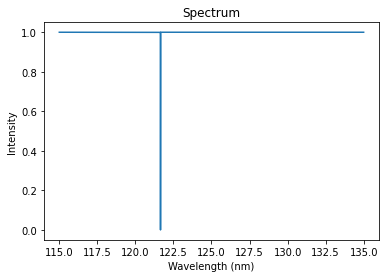

-----------------------------


In [18]:
# Create object of the spectrum class with the above properties
obj = Spectrum(2.46607e15, 10e14, 10 ** 6, 115, 135)
# Calculate the data required for the plot
obj.generate()

print("-----------------------------")
print("Number of wavelengths sampled: ", len(obj))
print(obj)
# We select the wavelength for which we have a corresponding minimum intensity
# In retrospect, using dictionaries could have made this step easier.
print("Wavelength of Minimum Intensity: ",
      obj.wavelengths[obj.intensities.index(min(obj.intensities))],
      "nm")
# Now, we print the minimum intensity
print("Minimum Intensity: ",
      obj.intensities[obj.intensities.index(min(obj.intensities))])
obj.show()
print("-----------------------------")

Now that's more like it! The value of minimum intensity is in the range of 10 ^ -237, which we can assume to be 0. This gets us a wavelength of 121.65104000000001 nm.

An interesting observation we can make here, is with regards to the steepness with which the value falls. At 121.66 nm, almost no light was being absorbed. But for a wavelength almost just 0.01 *nm* shorter, almost all the light gets absorbed.

This above observation raises an interesting question, though. Can we find the "width" of this fall, in the spectrum? Can we find the first wavelength at which the intensity starts decreasing by a non-negligible number, and also the wavelength at which the intensity again appears to reach it's non-negligible change state?

Let's try that out down below!

In [22]:
# If intensity drops below this value, we assume it to be the start of the fall.
# If intensity jumps above this value, we assume the fall has ended.
THRESHOLD = 0.999
# Initialise the values of these markers
low = None
high = None

# Loop through all the wavelengths in the list to find these values
for i in range(len(obj.intensities)):
    intensity = obj.intensities[i]
    wavelength = obj.wavelengths[i]
    
    # If the intensity is dropping below the treshold the first time
    if intensity < THRESHOLD and not low:
        low = wavelength
    
    # If the intensity jumps above the treshold for the first time
    if intensity > THRESHOLD and low:
        high = wavelength
        # Exit the loop, for obvious reasons
        break

-----------------------------
Number of wavelengths sampled:  1000000
Central Frequency : 2466070000000000.0
Thickness of slab : 1000000000000000.0
Wavelength of Minimum Intensity:  121.65104000000001 nm
Minimum Intensity:  4.453076925392638e-237
-----------------------------
The threshold we've set is:  0.999
Lower wavelength is:  121.64486000000001 nm
Upper wavelength is:  121.65724 nm
Bandwidth is:  0.012379999999993174 nm


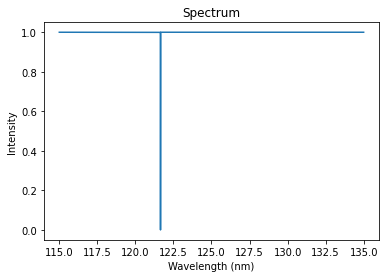

-----------------------------


In [26]:
print("-----------------------------")
print("Number of wavelengths sampled: ", len(obj))
print(obj)
print("Wavelength of Minimum Intensity: ",
      obj.wavelengths[obj.intensities.index(min(obj.intensities))],
      "nm")
# Now, we print the minimum intensity
print("Minimum Intensity: ",
      obj.intensities[obj.intensities.index(min(obj.intensities))])
print("-----------------------------")
print("The threshold we've set is: ", THRESHOLD)
print("Lower wavelength is: ", low, "nm")
print("Upper wavelength is: ", high, "nm")
print("Bandwidth is: ", high-low, "nm")
obj.show()
print("-----------------------------")

With all this information about the generated spectrum, we can make the following inferences:

For a gas slab with thickness 10 ^ 14 cm

1. The wavelength 121.65104000000001 nm gets absorbed the most
2. The minimum intensity observed within the range of 115 to 135 nm is 4.453076925392638e-237
3. For an intensity threshold of 0.999, we observe a bandwidth of 0.012379999999993174 nm wherein the gas medium absorbs the incident light.

Now that we've made these observations for this case, it's time to do the same for the remaining two cases (d = 10 ^ 18 cm and d = 10 ^ 21 cm)

The results for those two values of slab thickness can be found below.

-----------------------------
Number of wavelengths sampled:  1000000
Central Frequency : 2466070000000000.0
Thickness of slab : 1e+19
Wavelength of Minimum Intensity:  121.65033999999999 nm
Minimum Intensity:  0.0
-----------------------------
The threshold we've set is:  0.999
Lower wavelength is:  121.03523999999999 nm
Upper wavelength is:  122.27318 nm
Bandwidth is:  1.237940000000009 nm


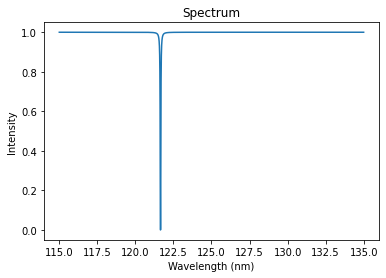

-----------------------------


In [27]:
# v0 = 2.46607 * 10 ^ 15
# d = 10 ^ 18
# Create object of the spectrum class with the above properties
obj = Spectrum(2.46607e15, 10e18, 10 ** 6, 115, 135)
# Calculate the data required for the plot
obj.generate()
# -------------------------------------------------------------------
# If intensity drops below this value, we assume it to be the start of the fall.
# If intensity jumps above this value, we assume the fall has ended.
THRESHOLD = 0.999
# Initialise the values of these markers
low = None
high = None

# Loop through all the wavelengths in the list to find these values
for i in range(len(obj.intensities)):
    intensity = obj.intensities[i]
    wavelength = obj.wavelengths[i]
    
    # If the intensity is dropping below the treshold the first time
    if intensity < THRESHOLD and not low:
        low = wavelength
    
    # If the intensity jumps above the treshold for the first time
    if intensity > THRESHOLD and low:
        high = wavelength
        # Exit the loop, for obvious reasons
        break
# -------------------------------------------------------------------
print("-----------------------------")
print("Number of wavelengths sampled: ", len(obj))
print(obj)
print("Wavelength of Minimum Intensity: ",
      obj.wavelengths[obj.intensities.index(min(obj.intensities))],
      "nm")
# Now, we print the minimum intensity
print("Minimum Intensity: ",
      obj.intensities[obj.intensities.index(min(obj.intensities))])
print("-----------------------------")
print("The threshold we've set is: ", THRESHOLD)
print("Lower wavelength is: ", low, "nm")
print("Upper wavelength is: ", high, "nm")
print("Bandwidth is: ", high-low, "nm")
obj.show()
print("-----------------------------")

From this, we can make the following observations :

For a gas slab with thickness 10 ^ 18 cm

1. The wavelength 121.65033999999999 nm gets absorbed the most
2. The minimum intensity observed within the range of 115 to 135 nm is 0.0
3. For an intensity threshold of 0.999, we observe a bandwidth of 1.237940000000009 nm wherein the gas medium absorbs the incident light.

From this, we can see that with an increase in the distance travelled across the medium, we have an increase in the bandwidth at which the light gets absorbed.

-----------------------------
Number of wavelengths sampled:  10000000
Central Frequency : 2466070000000000.0
Thickness of slab : 1e+22
Wavelength of Minimum Intensity:  121.62837599999999 nm
Minimum Intensity:  0.0
-----------------------------
The threshold we've set is:  0.99
Lower wavelength is:  115.77387599999999 nm
Upper wavelength is:  128.156836 nm
Bandwidth is:  12.382960000000011 nm


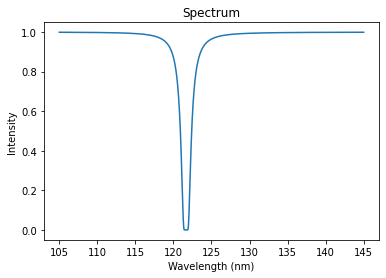

-----------------------------


In [33]:
# v0 = 2.46607 * 10 ^ 15
# d = 10 ^ 21
# Create object of the spectrum class with the above properties
obj = Spectrum(2.46607e15, 10e21, 10 ** 7, 105, 145)
# Calculate the data required for the plot
obj.generate()
# -------------------------------------------------------------------
# If intensity drops below this value, we assume it to be the start of the fall.
# If intensity jumps above this value, we assume the fall has ended.
THRESHOLD = 0.99
# Initialise the values of these markers
low = None
high = None

# Loop through all the wavelengths in the list to find these values
for i in range(len(obj.intensities)):
    intensity = obj.intensities[i]
    wavelength = obj.wavelengths[i]
    
    # If the intensity is dropping below the treshold the first time
    if intensity < THRESHOLD and not low:
        low = wavelength
    
    # If the intensity jumps above the treshold for the first time
    if intensity > THRESHOLD and low:
        high = wavelength
        # Exit the loop, for obvious reasons
        break
# -------------------------------------------------------------------
print("-----------------------------")
print("Number of wavelengths sampled: ", len(obj))
print(obj)
print("Wavelength of Minimum Intensity: ",
      obj.wavelengths[obj.intensities.index(min(obj.intensities))],
      "nm")
# Now, we print the minimum intensity
print("Minimum Intensity: ",
      obj.intensities[obj.intensities.index(min(obj.intensities))])
print("-----------------------------")
print("The threshold we've set is: ", THRESHOLD)
print("Lower wavelength is: ", low, "nm")
print("Upper wavelength is: ", high, "nm")
print("Bandwidth is: ", high-low, "nm")
obj.show()
print("-----------------------------")

From this, we can make the following observations :

For a gas slab with thickness 10 ^ 21 cm

1. The wavelength 121.62837599999999 nm gets absorbed the most
2. The minimum intensity observed within the range of 105 to 145 nm is 0.0
3. For an intensity threshold of 0.99, we observe a bandwidth of 12.382960000000011 nm wherein the gas medium absorbs the incident light.

We had to update the threshold and calculation range for this case, to account for the fact that atleast some of the light was getting absorbed by the gas at all wavelengths. This means that for very large distances of travel, we have atleast some of the light getting absorbed along the way without the wavelength being exactly equal to the transition, which implies one of the following cases being true:

1. We've broken the formula by throwing huge inputs at it.
2. Electron's are not as picky as we've been led to belive and will absorb photons regardless of their wavelength, but at a very low probabilities. Hence, we need very long distances to observe this phenomenon.

Now, let's generate the spectra for the other 3 cases, by changing the value of the central frequency (v0)

In [38]:
# I just realised that we've been writing this same block of code a *lot* of times.
# So it's been wrapped up into a function.
def doEverything(obj):
    # Calculate the data required for the plot
    obj.generate()
    # -------------------------------------------------------------------
    # If intensity drops below this value, we assume it to be the start of the fall.
    # If intensity jumps above this value, we assume the fall has ended.
    THRESHOLD = 0.999
    # Initialise the values of these markers
    low = None
    high = None

    # Loop through all the wavelengths in the list to find these values
    for i in range(len(obj.intensities)):
        intensity = obj.intensities[i]
        wavelength = obj.wavelengths[i]

        # If the intensity is dropping below the treshold the first time
        if intensity < THRESHOLD and not low:
            low = wavelength

        # If the intensity jumps above the treshold for the first time
        if intensity > THRESHOLD and low:
            high = wavelength
            # Exit the loop, for obvious reasons
            break
    # -------------------------------------------------------------------
    print("-----------------------------")
    print("Number of wavelengths sampled: ", len(obj))
    print(obj)
    print("Wavelength of Minimum Intensity: ",
          obj.wavelengths[obj.intensities.index(min(obj.intensities))],
          "nm")
    # Now, we print the minimum intensity
    print("Minimum Intensity: ",
          obj.intensities[obj.intensities.index(min(obj.intensities))])
    print("-----------------------------")
    print("The threshold we've set is: ", THRESHOLD)
    print("Lower wavelength is: ", low, "nm")
    print("Upper wavelength is: ", high, "nm")
    print("Bandwidth is: ", high-low, "nm")
    obj.show()
    print("-----------------------------")

-----------------------------
Number of wavelengths sampled:  1000000
Central Frequency : 2466320000000000.0
Thickness of slab : 1000000000000000.0
Wavelength of Minimum Intensity:  121.63872 nm
Minimum Intensity:  0.0
-----------------------------
The threshold we've set is:  0.999
Lower wavelength is:  121.63254 nm
Upper wavelength is:  121.64492 nm
Bandwidth is:  0.012379999999993174 nm


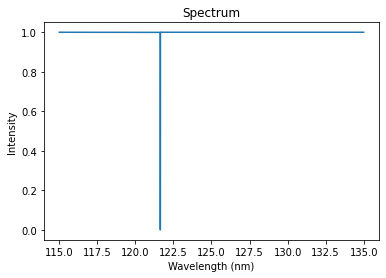

-----------------------------


In [39]:
# v0 = 2.46632 * 10 ^ 15
# d = 10 ^ 14
# Create object of the spectrum class with the above properties
obj = Spectrum(2.46632e15, 10e14, 10 ** 6, 115, 135)
doEverything(obj)

From the above graph, we can see that

1. The wavelength 121.63872 nm gets absorbed the most
2. The minimum intensity observed within the range of 115 to 135 nm is 0
3. For an intensity threshold of 0.999, we observe a bandwidth of 0.012379999999993174 nm wherein the gas medium absorbs the incident light.

Now, let's move on to a thickness of 10 ^ 18 cm

-----------------------------
Number of wavelengths sampled:  1000000
Central Frequency : 2466320000000000.0
Thickness of slab : 1e+19
Wavelength of Minimum Intensity:  121.638 nm
Minimum Intensity:  0.0
-----------------------------
The threshold we've set is:  0.999
Lower wavelength is:  121.02304000000001 nm
Upper wavelength is:  122.26071999999999 nm
Bandwidth is:  1.2376799999999832 nm


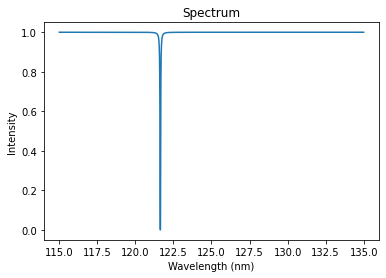

-----------------------------


In [40]:
# v0 = 2.46632 * 10 ^ 15
# d = 10 ^ 18
# Create object of the spectrum class with the above properties
obj = Spectrum(2.46632e15, 10e18, 10 ** 6, 115, 135)
doEverything(obj)

From the above graph, we can see that

1. The wavelength 121.638 nm gets absorbed the most
2. The minimum intensity observed within the range of 115 to 135 nm is 0
3. For an intensity threshold of 0.999, we observe a bandwidth of 1.2376799999999832 nm wherein the gas medium absorbs the incident light.

Now, let's move on to a thickness of 10 ^ 21 cm

-----------------------------
Number of wavelengths sampled:  10000000
Central Frequency : 2466320000000000.0
Thickness of slab : 1e+22
Wavelength of Minimum Intensity:  121.61605000000002 nm
Minimum Intensity:  0.0
-----------------------------
The threshold we've set is:  0.999
Lower wavelength is:  104.78169000000001 nm
Upper wavelength is:  144.95945 nm
Bandwidth is:  40.17775999999999 nm


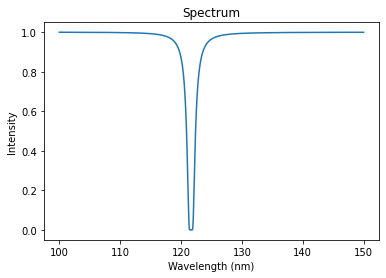

-----------------------------


In [43]:
# v0 = 2.46632 * 10 ^ 15
# d = 10 ^ 21
# Create object of the spectrum class with the above properties
obj = Spectrum(2.46632e15, 10e21, 10 ** 7, 100, 150)
doEverything(obj)

For the above graph, we can see that:

1. The wavelength 121.61605000000002 nm gets absorbed the most
2. The minimum intensity observed within the range of 100 to 150 nm is 0.0
3. For an intensity threshold of 0.999, we observe a bandwidth of 40.17775999999999 nm wherein the gas medium absorbs the incident light.

Now there are a couple of things to note here, before we wrap up.

As we know, we've focused on a specific transition and spent our time trying to generate that particular spectral line. The transition we were focussing on is that of an electron in the n=1 energy state of a Hydrogen atom which absorbs a photon and jumps up to n=2. We know that the actual value of the wavelength at which this transition occurs is around 121.567 nm. The value we got from the formula came out to be around 121.63 nm, which gives an error of about 0.0518%.

Also, the thresholds of 0.999 and 0.99 were arbitrarily chosen, to serve as guide posts for further inferences. Their physical meaning is that the intensity of the light observed is less than 0.999 or 0.99. Although this kind of intensity dip is most likely to be indistinguishable from sensor noise in the real world, we roll with it anyway as we're working with noise-less, generated data.

Another thing to note here is that the wavelength for the "minimum" intensity observed is found from the smallest element in the list. We have not checked if the minimum intensity value (0) has been observed for multiple wavelengths. This is especially important to make note of in the second set of graphs, where we used v0 = 2.46632 * 10 ^ 15 Hz, because from the generated graphs it looks like there might be multiple wavelengths which are completely absorbed by the atoms. But since this doesn't make much sense (we should ideally have only one wavelength of maximum absorption), I have written off this issue as an unfortunate consequence of stressing a formula beyond it's natural limits.

This concludes the detailed explanation about how we got the graphs we did. Check the Short version for the final answers.